In [9]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE

import matplotlib.patheffects as PathEffects

In [2]:
digits = load_digits()

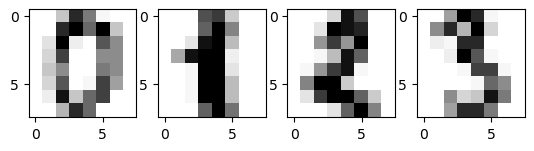

In [3]:
# Plot the data
# imshow: Display data as an image
fig, ax = plt.subplots(1,4)
for i in range(4):
    ax[i].imshow(digits.images[i], cmap="Greys")

In [4]:
# To see how the data is stored in digits.images[i]
digits.images[1]

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [5]:
# To see how the data is stored in digits.data
digits.data.shape
# Each row store the 8*8 digits

(1797, 64)

In [6]:
# digits.target store the class labels
np.unique(digits.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
# Store the features and class labels separately
X_digits = digits.data
y_digits = digits.target

In [8]:
# t-SNE
tsne = TSNE(n_components=2, init='pca', random_state=123)
X_digits_tsne = tsne.fit_transform(X_digits)
# init='pca': use PCA to initialize t-SNE

C:\Users\bai_f\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\bai_f\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [13]:
# Visualization
def plot_projection(X, colors):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    for i in range(10):
        ax.scatter(X[colors==i, 0], X[colors==i, 1])
        
    for i in range(10):
        xtext, ytext = np.median(X[colors==i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([PathEffects.Stroke(linewidth=5, foreground='w'), PathEffects.Normal()])
    

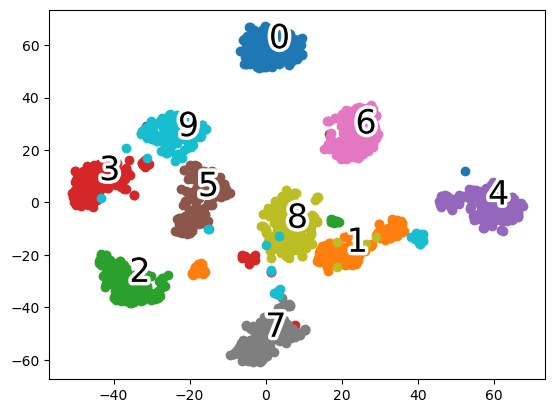

In [14]:
plot_projection(X=X_digits_tsne, colors=y_digits)